In [1]:
from manager import load_obj
import os
import re
import string
from collections import Counter
from pprint import pprint
from tqdm.notebook import tqdm
from itertools import combinations

In [2]:
works = load_obj("germanistik")

In [3]:
count= 0
for work in works:
    if work.references != "none":
        count += 1

In [6]:
dist={}
for work in works:
    try:
        if work.topic != None:
            if work.topic not in dist:
                dist[work.topic] = 1
            else:
                dist[work.topic] += 1
    except AttributeError:
        continue

for k, v in dist.items():
    dist[k] = round(v/603, 4)

In [7]:
dist = dict(sorted(dist.items(), key=lambda item: item[1], reverse = True))
dist

{'Textanalyse und Narratologie': 0.1592,
 'Sprachgebrauch bei Kindern und Jugendlichen': 0.1161,
 'Familienverhältnisse, Geschlechterrollen und Konflikte': 0.1045,
 'Politische Systme, Kriegs- und Nachkriegsliteratur': 0.0995,
 'Philosophie': 0.0978,
 'Mittelalter': 0.0962,
 'Lyrik': 0.0896,
 'Sprachwissenschaft': 0.0697,
 'Theater, Drama und Tragödie': 0.0531,
 'Kommunikationswissenschaften': 0.0481,
 'Themen um Gewalt und Psychologie': 0.0415,
 'Religion, Glaube und Kirche': 0.0249}

In [9]:
index_work = {}
for index,work in enumerate(works):
    index_work[work.link.split("/")[-1]] = index

In [11]:
def find_tag(text, tag):
    
    reg_start = re.compile(fr"(\<{tag}\>)")
    reg_end =  re.compile(fr"(\<\/{tag}\>)")
    start = [m.start() for m in re.finditer(reg_start, text)]
    end = [m.start() for m in re.finditer(reg_end, text)]
    
    aut=""
    if start and end:
        for s,e in zip(start,end):
            aut += re.sub(r"<[^>]*>", "", text[s:e] + "  ")
    else:
        aut = ""
    return aut

In [12]:
def create_ref_dic(text):
    references ={"autoren": []}
    refs = text.split("<\/sequence")
    for ref in refs:
        text = find_tag(ref, "author")
        authors = re.split("  |\/", text)
        print(authors)
        authors = [x for x in authors if len(x) > 0]
        if len(authors) != 0:
            references["autoren"] += authors
    return references

In [13]:
path = r"C:\Users\Tim\Desktop\bachelorarbeit\Parsed_References"
for filename in os.listdir(r"C:\Users\Tim\Desktop\bachelorarbeit\Parsed_References"):
    with open(os.path.join(path, filename), 'r', encoding = "utf-8") as f: # open in readonly mode
        name = os.path.basename(f.name).split(".")[0]
        if index_work.get(name) != None:
            works[index_work.get(name)].ref_authors = create_ref_dic(f.read())

['Augst, G', 'Eisenberg, P', 'Stuttgart', 'Weimar', 'Günther, H', 'Hofrichter, W', '']
['Elisabeth Bronfen', 'Elisabeth Bronfen', 'Klaus Lubbers', 'N. Friedman', '']
['Arnold, Heinz L.', 'Bienek, Horst', 'Dithmar, Reinhard', 'Dürrenmatt, Friedrich', 'Große, Wilhelm: Friedrich', 'Koch-Häbel, Bärbel', 'Schneider, Jost', 'Wilpert, Gero', '']
['Hofmannsthal, Hugo', 'George, Stefan, Hymnen', 'George, Stefan', 'Goethe, Johann', 'Wolfgang, Faust, 10. Aufl., C.H', 'Oelmann, Ute', 'Beimdick, Walter', 'Der Große', 'Brockhaus', 'S', 'Heliogabal', 'Prill, Meinhard, August', 'Klussmann, Paul', 'Landmann', 'Braungart, Wolfgang, Ästhetischer', 'Claude, David, Stefan', 'George', 'Durzak, Manfred', 'George', 'Kaminska, Krystyna, Der', 'Kiefer, Reinhard', ' Jungheim', 'Birgitt', 'Morwitz, Ernst', 'Rasch, Wolfdietrich, Stefan Georges', 'Seidler, Manfred', 'Simons, Gabriel', 'Sprengel, Peter', '']
['Bloom, Margret', 'Brock-Sulzer, Elisabeth', 'Dürrenmatt, Friedrich', 'Dürrenmatt, Friedrich', 'Keckeis, Her

['Albes, Claudia', 'Stifter', 'Evans, Tamara S.: Robert', 'Fuchs, Anne', 'Jürgens, Martin: Robert', 'Walser. Die Krise der Darstellbarkeit: Untersuchungen zur Prosa, 2. Aufl.; In: Kreuzer, Helmut (Hrg.): Theorie-Kritik-Geschichte, Band 4; Scriptor, Kronberg', 'Kieserling-Sonntag, Jochem', 'Martin, Maurice-Jean', 'Mohr, Daniela', 'Robert Walser', 'Robert Walser', 'Robert Walser', 'Frankfurt', 'Main', 'Rothemann, Sabine', 'Schwahl, Markus', 'Sebald, W. G.', 'Siegel, Ilona', 'Stefani, Guido', 'Zytglogge, Zürich', 'Walser, Robert', 'Weppen, Wolfgang', '']
['Loquai, Franz', 'Schedel, Susanne', 'Sebald, W.G', 'W.G. Sebald', 'W.G. Sebald', '']
['Ankum, Katharina', 'Behn, Manfred', 'Cercignani, Fausto', 'Elsner, Ursula', 'Emmerich, Wolfgang', 'Glau, Katherina', 'Hermann, István', 'Hilzinger, Sonja', 'Jurgensen, Manfred', 'Band I', 'Luchterhand, Darmstadt', 'Meyer, Egbert', 'Müller, Wolfgang', 'Pak, Schoro', 'Reinhild, Köhler-Hausmann', 'Rospleszcz, Christian', 'Rosshoff, Hartmut', 'Rotermund, 

# Get Most Common Topic per Author



In [14]:
def compare_names(author, dic, topic):
    new_dic = dic
    namelist = list(new_dic.keys())
    count = 0
    appended = False
    if len(namelist) != 0:
        
        for nam in namelist:
            if is_author(author, nam):
                count = 0
                for entry in new_dic[nam]:
                    if is_author(author, entry[0]):
                        count += 1
                
                if count/len(new_dic[nam]) >= 0.7:
      
                    new_dic[nam].append([author, topic])
                    return new_dic
                else:
               
                    new_dic[nam] = [[author,topic]]
                    return new_dic
            else:
                continue

        new_dic[author]=[[author,topic]]
        return new_dic
                
    else:

        new_dic[author] = [[author,topic]]
        return new_dic

In [15]:
def is_author(author, compare):
    name = author.split(" ")
    name = list(filter(None, name))

    name_compare = compare.split(" ")
    name_compare = list(filter(None, name_compare))
    flag = False
    full_name_flag = False
    if len(name) >= len(name_compare):
        prob = len(name_compare)
        tmp = name_compare
        name_compare = name
        name = tmp
    else:
        prob = len(name)
    new_prob = 0   

    beginners_n = [x[0] for x in name]
    beginners_nc = [x[0] for x in name_compare]
    
    
    
    for n in beginners_n:
        if n in beginners_nc:
            beginners_nc.remove(n)
        else:
            return False
            
    for i, n in enumerate(name):
            
            for j,nc in enumerate(name_compare):
                if (i==j) and (nc == n):
                    new_prob +=1
            
            if new_prob/prob > 0.5:
                return True
            
            elif n[0] not in (x[0] for x in name_compare):
                flag = False
                break

                
            elif (len(n) > 1) and n in name_compare:
                flag = True
                full_name_flag = True
    
            else:
              
                for nc in name_compare:
                    if (n[0] == nc[0]) and ((len(nc) == 1) or (len(n) == 1)):
                        flag = True    
                        
                    elif(n[0] == nc[0]):
                        control = min(len(n), len(nc))
                        if n[:control]!= nc[:control]:
                            return False
                    
                    
    if flag and full_name_flag:
        return True
    else:
        return False

In [16]:
is_author("jauss hans", "katharinavermeer hans j")

True

In [17]:
is_author("a dostojewski fjodor m", "dostojewskij fjodor m" )

True

In [18]:
count = 0
authors = []
### per document only one author
for work in tqdm(works):
    if work.references != "none" and work.link.split("/")[-1] != "283936":
       

        dics = {}
        ## if author longer than 6 skip name!!
       
        auts = [x.lower() for x in work.ref_authors["autoren"]]
        auts = [x.translate(str.maketrans('', '', string.punctuation)) for x in auts]
        for aut in auts:
         
    
            if len(aut.split(" ")) >= 5 or aut == "" or len(aut.split(" ")) == 1:
                continue
            dics = compare_names(aut, dics,work.topic)
            count += 1
        authors.append([list(dics.keys()), work.topic])

final_dic = {}

for aut in tqdm(authors):
    for name in aut[0]:
        final_dic = compare_names(name, final_dic, aut[1])
        

  0%|          | 0/1028 [00:00<?, ?it/s]

  0%|          | 0/603 [00:00<?, ?it/s]

In [19]:
result = dict(sorted(final_dic.items(), key=lambda item: len(item[1]), reverse = True))

In [20]:
result

{'goethe johann wolfgang': [['goethe johann wolfgang',
   'Theater, Drama und Tragödie'],
  ['goethe johann wolfgang', 'Themen um Gewalt und Psychologie'],
  ['johann wolfgang', 'Philosophie'],
  ['goethe johann wolfgang', 'Sprachwissenschaft'],
  ['goethe johann wolfgang', 'Textanalyse und Narratologie'],
  ['goethe johann', 'Philosophie'],
  ['goethe johann wolfgang',
   'Familienverhältnisse, Geschlechterrollen und Konflikte'],
  ['goethe johann wolfgang', 'Textanalyse und Narratologie'],
  ['goethe johann wolfgang',
   'Familienverhältnisse, Geschlechterrollen und Konflikte'],
  ['goethe johann wolfgang', 'Textanalyse und Narratologie'],
  ['goethe johann wolfgang', 'Philosophie'],
  ['johann wolfgang von goethe', 'Philosophie'],
  ['johann wolfgang goethe', 'Theater, Drama und Tragödie'],
  ['goethe johann', 'Religion, Glaube und Kirche'],
  ['johann wolfgang goethe', 'Lyrik'],
  ['goethe johann wolfgang',
   'Politische Systme, Kriegs- und Nachkriegsliteratur'],
  ['goethe johann

In [21]:
from collections import Counter
dominant_topic={}
for key, value in result.items():
    topics = dict(Counter([x[1] for x in value]))
    highest = max(topics, key=topics.get)
    dominant_topic[key] = highest


In [22]:
dominant_topic

{'goethe johann wolfgang': 'Philosophie',
 'bumke joachim': 'Mittelalter',
 'nietzsche friedrich': 'Philosophie',
 'hartmann von': 'Mittelalter',
 'schiller friedrich': 'Mittelalter',
 'freud sigmund': 'Philosophie',
 'bußmann hadumod': 'Sprachwissenschaft',
 'dürrenmatt friedrich': 'Theater, Drama und Tragödie',
 'mann thomas „der': 'Familienverhältnisse, Geschlechterrollen und Konflikte',
 'wehrli max': 'Mittelalter',
 'adorno theodor w': 'Philosophie',
 'schmidt jochen': 'Philosophie',
 'franz kafka': 'Familienverhältnisse, Geschlechterrollen und Konflikte',
 'haug walter': 'Mittelalter',
 'heinzle joachim': 'Mittelalter',
 'ruh kurt': 'Mittelalter',
 'brunner horst': 'Lyrik',
 'brecht bertolt': 'Theater, Drama und Tragödie',
 'hoffmann eta': 'Textanalyse und Narratologie',
 'martinez matias': 'Textanalyse und Narratologie',
 'grimm jacob': 'Mittelalter',
 'wolfram von eschenbach': 'Mittelalter',
 'foucault michel': 'Themen um Gewalt und Psychologie',
 'bachmann ingeborg': 'Textanal

In [23]:
final_result = {}
for key, value in result.items():
    final_result[key] = len(value)

In [24]:
final_result

{'goethe johann wolfgang': 38,
 'bumke joachim': 28,
 'nietzsche friedrich': 15,
 'hartmann von': 13,
 'schiller friedrich': 12,
 'freud sigmund': 12,
 'bußmann hadumod': 12,
 'dürrenmatt friedrich': 11,
 'mann thomas „der': 11,
 'wehrli max': 11,
 'adorno theodor w': 11,
 'schmidt jochen': 10,
 'franz kafka': 10,
 'haug walter': 10,
 'heinzle joachim': 10,
 'ruh kurt': 10,
 'brunner horst': 9,
 'brecht bertolt': 9,
 'hoffmann eta': 8,
 'martinez matias': 8,
 'grimm jacob': 8,
 'wolfram von eschenbach': 8,
 'foucault michel': 8,
 'bachmann ingeborg': 8,
 'büchner georg': 7,
 'fleischer wolfgang': 7,
 'gadamer hansgeorg': 7,
 'schröder werner': 7,
 'celan paul': 7,
 'mayer hans': 7,
 'eco umberto': 7,
 'lewandowski theodor': 7,
 'de boor helmut': 7,
 'kluge friedrich': 7,
 'chomsky noam': 7,
 'saussure ferdinand': 7,
 'frenzel elisabeth': 7,
 'jaspers karl': 6,
 'baumgart reinhard': 6,
 'lexer matthias': 6,
 'paul hermann': 6,
 'arnold heinz': 6,
 'knopf jan friedrich': 6,
 'martini fri

# Find Co-authors and topic from author


In [21]:
def compare_names_without_topic(author, dic):
    new_dic = dic
    namelist = list(new_dic.keys())
    count = 0
    appended = False
    if len(namelist) != 0:
        
        for nam in namelist:
            if is_author(author, nam):
                count = 0
                for entry in new_dic[nam]:
                    if is_author(author, entry):
                        count += 1
                
                if count/len(new_dic[nam]) >= 0.7:
      
                    new_dic[nam] += [author]
                    return new_dic
                else:
               
                    new_dic[nam] = [author]
                    return new_dic
            else:
                continue

        new_dic[author]=[author]
        return new_dic
                
    else:

        new_dic[author] = [author]
        return new_dic

In [22]:
list_30 = [k for k,v in final_result.items() if v >= 2]

In [23]:
cowriters = {}
for elem in list_30:
    cowriters[elem] = []
    


count = 0

for work in tqdm(works):
    if work.references != "none" and work.link.split("/")[-1] != "283936":
        dic ={}

        ## if author longer than 6 skip name!!  
        auts = [x.lower() for x in work.ref_authors["autoren"]]
        auts = [x.translate(str.maketrans('', '', string.punctuation)) for x in auts]
        
        for aut in auts:
            if len(aut.split(" ")) >= 5 or aut == "" or len(aut.split(" ")) == 1:
                continue
            else:
                dic = compare_names_without_topic(aut, dic)
        
       
        authors = list(dic.keys())  
        for index, a in enumerate(authors):
            for na in list_30:
                if is_author(a,na):
                    authors[index] = na
                    break
                    
        for aut in authors:
            for n in list_30:
                if is_author(aut,n):
                    cowriters[n] += authors


  0%|          | 0/1028 [00:00<?, ?it/s]

In [24]:
new_co ={}
for key, val in cowriters.items():
    res = {}
    for name in val:
        if len(name.split(" ")) >= 5 or aut == "" or len(name.split(" ")) == 1:
                continue
        new_co[key] = compare_names_without_topic(name , res)

In [25]:
for key, val in new_co.items():
    new_co[key] = dict(sorted(val.items(), key=lambda item: len(item[1]), reverse = True))
    for k,v in val.items():
        new_co[key][k] = len(v)
    

    

In [26]:
for key, val in list(new_co.items()):
    for k,v in list(val.items()):
        if v < 2:
            del new_co[key][k]

In [27]:
for key, val in list(new_co.items()):
    for k,v in list(val.items()):
        if is_author(k,key):
            del new_co[key][k]
      
       

In [28]:
for key, val in list(new_co.items()):
    if not val:
        del new_co[key]

In [29]:
for index, val in enumerate(new_keys):
    if val == "friedrich nietzsche der":
        new_keys[index] = "friedrich nietzsche"
    if val == "arendt hannah franz":
        new_keys[index] = "arendt hannah"
    if val == "fleischer wolfgang barz irmhild":
        new_keys[index] = "fleischer wolfgang"
    

NameError: name 'new_keys' is not defined

In [30]:
key_list = []
id_dic ={}
for key, value in new_co.items():
    key_list += value.keys()
    key_list += new_co.keys()
    key_list = list(set(key_list))


count = 0
for name in key_list:
    id_dic[name] = count
    count+=1


In [31]:
new_co

{'goethe johann wolfgang': {'schmidt jochen': 4,
  'wilpert gero': 4,
  'nietzsche friedrich': 3,
  'eckermann johann peter': 3,
  'müller joachim': 3,
  'meier albert': 2,
  'spillner bernd': 2,
  'rousseau jeanjacques': 2,
  'neumann gerhard': 2,
  'mann thomas „der': 2,
  'freund winfried': 2,
  'lenz jacob michael': 2,
  'lessing gotthold e': 2,
  'blessin stefan johann wolfgang': 2,
  'karthaus ulrich sturm': 2,
  'vaget hans rudolf': 2,
  'martini fritz': 2,
  'michelsen peter goethes': 2,
  'hamm heinz': 2,
  'von goethe johann': 2},
 'bumke joachim': {'hartmann von': 6,
  'wolfram von eschenbach': 6,
  'wehrli max': 5,
  'haug walter': 4,
  'mohr wolfgang': 4,
  'wapnewski peter': 4,
  'maurer f': 4,
  'cormeau christoph': 3,
  'brunner horst': 3,
  'fisher rodney': 3,
  'heinzle joachim': 3,
  'kuhn hugo': 3,
  'schröder werner': 3,
  'schwietering julius': 3,
  'weber gottfried': 3,
  'ruh kurt': 3,
  'weddige hilkert': 3,
  'althoff gerd': 3,
  'kartschoke dieter': 3,
  'rei

In [32]:
id_dic

{'george lakoff': 0,
 'mayer hans': 1,
 'brecht bertolt': 2,
 'mann klaus': 3,
 'mark johnson': 4,
 'androutsopoulos jannis k': 5,
 'motsch wolfgang': 6,
 'bräuer r': 7,
 'blank walter': 8,
 'richter w': 9,
 'stephens anthony r': 10,
 'wintersteiner werner': 11,
 'ruh kurt': 12,
 'kolb herbert': 13,
 'jäger siegfried': 14,
 'albertsen elisabeth': 15,
 'ricoeur paul': 16,
 'kühne andreas': 17,
 'pinker s': 18,
 'albes claudia': 19,
 'bünting karldieter': 20,
 'bachtin michail': 21,
 'hahn i': 22,
 'kaiser ernst': 23,
 'röcke w': 24,
 'freund winfried': 25,
 'laplanche j': 26,
 'gönner gerhard': 27,
 'kleist heinrich von': 28,
 'hartmann von': 29,
 'eichendorff joseph': 30,
 'schirok bernd': 31,
 'schwietering julius': 32,
 'sperber d': 33,
 'margetts john': 34,
 'meier albert': 35,
 'de loecker armand': 36,
 'eisenberg peter': 37,
 'jäger lorenz der': 38,
 'vaget hans rudolf': 39,
 'von torne': 40,
 'derrida jacques': 41,
 ' buscha': 42,
 'dittmar n': 43,
 'rehbein jochen': 44,
 'mann t

In [35]:
#### create node csv
import csv

with open("gephi/node_germanistik_topic.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Id", "Label", "color VARCHAR"])
    for key, value in id_dic.items():
        names = dominant_topic.keys()
        for n in names:
            if is_author(key, n):
                writer.writerow([value, key, dominant_topic.get(n)])
                break

In [36]:
### create edge csv
import csv

with open("gephi/edge_germanisitk_topic.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Source", "Target", "Weight"])
    for key, value in new_co.items():
        for k,v in value.items():
         
            writer.writerow([id_dic.get(key), id_dic.get(k), v])

# Diversity of Authors over Topics

In [17]:
result

{'goethe johann wolfgang': [['goethe johann wolfgang',
   'Theater, Drama und Tragödie'],
  ['goethe johann wolfgang', 'Themen um Gewalt und Psychologie'],
  ['johann wolfgang', 'Philosophie'],
  ['goethe johann wolfgang', 'Sprachwissenschaft'],
  ['goethe johann wolfgang', 'Textanalyse und Narratologie'],
  ['goethe johann', 'Philosophie'],
  ['goethe johann wolfgang',
   'Familienverhältnisse, Geschlechterrollen und Konflikte'],
  ['goethe johann wolfgang', 'Textanalyse und Narratologie'],
  ['goethe johann wolfgang',
   'Familienverhältnisse, Geschlechterrollen und Konflikte'],
  ['goethe johann wolfgang', 'Textanalyse und Narratologie'],
  ['goethe johann wolfgang', 'Philosophie'],
  ['johann wolfgang von goethe', 'Philosophie'],
  ['johann wolfgang goethe', 'Theater, Drama und Tragödie'],
  ['goethe johann', 'Religion, Glaube und Kirche'],
  ['johann wolfgang goethe', 'Lyrik'],
  ['goethe johann wolfgang',
   'Politische Systme, Kriegs- und Nachkriegsliteratur'],
  ['goethe johann

In [38]:
goethe={}
for k,v in result.items():
    for entry in v:
        if k=="goethe johann wolfgang":
            if entry[1] not in goethe:
                goethe[entry[1]] = 1
            else:
                goethe[entry[1]] +=1
goethe = dict(sorted(goethe.items(), key=lambda item: item[1], reverse = True))
print(goethe)

{'Philosophie': 6, 'Textanalyse und Narratologie': 6, 'Familienverhältnisse, Geschlechterrollen und Konflikte': 6, 'Theater, Drama und Tragödie': 4, 'Lyrik': 4, 'Politische Systme, Kriegs- und Nachkriegsliteratur': 3, 'Themen um Gewalt und Psychologie': 2, 'Sprachwissenschaft': 2, 'Religion, Glaube und Kirche': 2, 'Mittelalter': 1, 'Sprachgebrauch bei Kindern und Jugendlichen': 1, 'Kommunikationswissenschaften': 1}


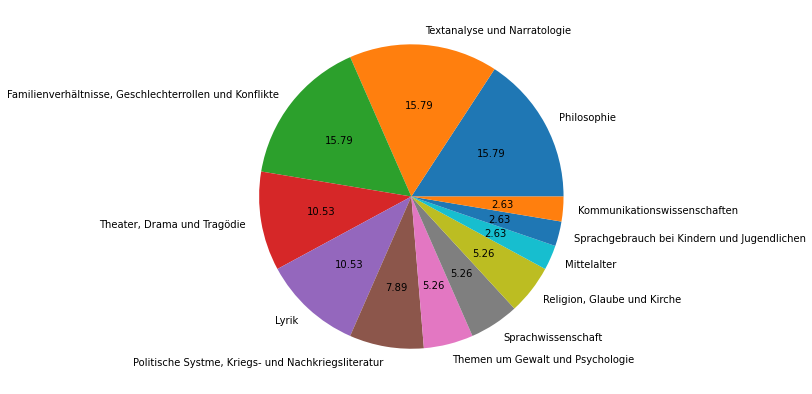

In [43]:
import matplotlib.pyplot as plt
import numpy as np

topics = list(goethe.keys())
nums = list(goethe.values())
y = np.array(nums)
mylabels = topics
plt.figure(figsize=(10,7))
plt.pie(y, labels = mylabels, autopct='%1.2f')
plt.show() 

In [18]:
names = list(result.keys())[:10]

# Herfindahl-Hirschmann Diversity


In [19]:
def diversity(dic):
    dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse = True))
    denominator = 0
    
    for index, vals in enumerate(dic.values()):
        denominator += (index+1) * vals
  
    return round(sum(dic.values())/denominator,3)

In [25]:
def hhi(dic): #herfindahl index
    dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse = True))
    total = sum(dic.values())
    result = 0
    for entry in dic.values():
        result+= (entry/total) ** 2
    return result

In [26]:
divers= {}
for k,v in list(result.items())[:30]:
    topics= {}
    count = 0
    for att in v:
        count +=1
        topic = att[1]
        if topic not in topics:
            topics[topic] = 1
        else:
            topics[topic] +=1

    divers[k] = hhi(topics)
    divers = dict(sorted(divers.items(), key=lambda item: item[1]))

6 38
6 38
6 38
4 38
4 38
3 38
2 38
2 38
2 38
1 38
1 38
1 38
18 28
7 28
1 28
1 28
1 28
5 15
3 15
2 15
1 15
1 15
1 15
1 15
1 15
7 13
2 13
2 13
1 13
1 13
3 12
2 12
2 12
2 12
1 12
1 12
1 12
3 12
3 12
3 12
2 12
1 12
5 12
4 12
3 12
4 11
3 11
2 11
1 11
1 11
6 11
2 11
2 11
1 11
6 11
3 11
2 11
3 11
3 11
2 11
2 11
1 11
3 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
2 10
2 10
2 10
1 10
1 10
1 10
1 10
5 10
3 10
1 10
1 10
9 10
1 10
7 10
2 10
1 10
3 9
3 9
2 9
1 9
5 9
3 9
1 9
5 8
1 8
1 8
1 8
6 8
1 8
1 8
3 8
2 8
2 8
1 8
4 8
1 8
1 8
1 8
1 8
4 8
1 8
1 8
1 8
1 8
3 8
2 8
1 8
1 8
1 8
2 7
2 7
2 7
1 7
5 7
2 7
4 7
1 7
1 7
1 7
5 7
1 7
1 7
3 7
1 7
1 7
1 7
1 7
3 7
2 7
1 7
1 7


In [27]:
divers

{'goethe johann wolfgang': 0.11357340720221604,
 'schmidt jochen': 0.16000000000000006,
 'franz kafka': 0.16000000000000006,
 'schiller friedrich': 0.16666666666666666,
 'nietzsche friedrich': 0.19111111111111112,
 'freud sigmund': 0.22222222222222224,
 'adorno theodor w': 0.22314049586776857,
 'bachmann ingeborg': 0.25,
 'dürrenmatt friedrich': 0.256198347107438,
 'celan paul': 0.26530612244897955,
 'büchner georg': 0.2653061224489796,
 'grimm jacob': 0.28125,
 'brunner horst': 0.2839506172839506,
 'mayer hans': 0.30612244897959184,
 'wolfram von eschenbach': 0.3125,
 'foucault michel': 0.3125,
 'bußmann hadumod': 0.3472222222222222,
 'hartmann von': 0.3491124260355029,
 'haug walter': 0.36,
 'mann thomas „der': 0.371900826446281,
 'gadamer hansgeorg': 0.38775510204081637,
 'wehrli max': 0.40495867768595034,
 'brecht bertolt': 0.4320987654320988,
 'hoffmann eta': 0.4375,
 'bumke joachim': 0.4795918367346939,
 'ruh kurt': 0.5399999999999999,
 'schröder werner': 0.5510204081632654,
 'fl